In [1]:
import geopandas
import numpy
import numpy
import math
import shapely
import plots
import matplotlib.pyplot as plt

In [2]:
def to_ecef(lon, lat):
    x = numpy.cos(lon/360*math.pi*2) * numpy.cos(lat/360*math.pi*2)
    y = numpy.sin(lon/360*math.pi*2) * numpy.cos(lat/360*math.pi*2)
    z = numpy.sin(lat/360*math.pi*2)
    return x, y, z

def to_coords(x, y, z):
    lat = math.asin(z)*(180/math.pi)
    lon = math.atan(y/x)*(180/math.pi)
    return lon, lat

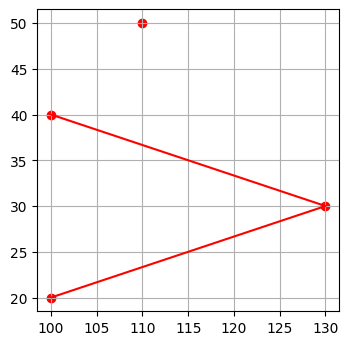

In [3]:
fig, ax = plt.subplots(dpi=100)
ax.grid(True)

geoms = []
point = numpy.array([110, 50])

node1 = numpy.array([100, 20])
node2 = numpy.array([130, 30])
node3 = numpy.array([100, 40])

geoms.append(shapely.geometry.Point(point))

geoms.append(shapely.geometry.LineString([node1, node2, node3]))
geoms.append(shapely.geometry.Point(node1))
geoms.append(shapely.geometry.Point(node2))
geoms.append(shapely.geometry.Point(node3))

geopandas.GeoDataFrame({'geom': geoms}).set_geometry('geom').plot(ax=ax, color='red')

In [5]:
point_ecef = to_ecef(point[0], point[1])
node1_ecef = to_ecef(node1[0], node1[1])
node2_ecef = to_ecef(node2[0], node2[1])
node3_ecef = to_ecef(node3[0], node3[1])

ray_dest = numpy.array([0, 0, 1])
ray = numpy.cross(point_ecef, ray_dest)

edge1_gc = numpy.cross(node1_ecef, node2_ecef)
left1_gc = numpy.cross(edge1_gc, node1_ecef)
right1_gc = numpy.cross(node2_ecef, edge1_gc)

edge2_gc = numpy.cross(node2_ecef, node3_ecef)
left2_gc = numpy.cross(edge2_gc, node2_ecef)
right2_gc = numpy.cross(node3_ecef, edge2_gc)

intersection1 = numpy.cross(edge1_gc, ray)
intersection2 = numpy.cross(edge2_gc, ray)

crosses1 = (numpy.dot(intersection1, left1_gc) * numpy.dot(intersection1, right1_gc)) > 0
crosses2 = (numpy.dot(intersection2, left1_gc) * numpy.dot(intersection2, right1_gc)) > 0

same_side1 = numpy.dot(point_ecef, edge1_gc) > 0
same_side2 = numpy.dot(point_ecef, edge2_gc) > 0

print(crosses1, same_side1)
print(crosses2, same_side2)

True True
True False


<IPython.core.display.Javascript object>


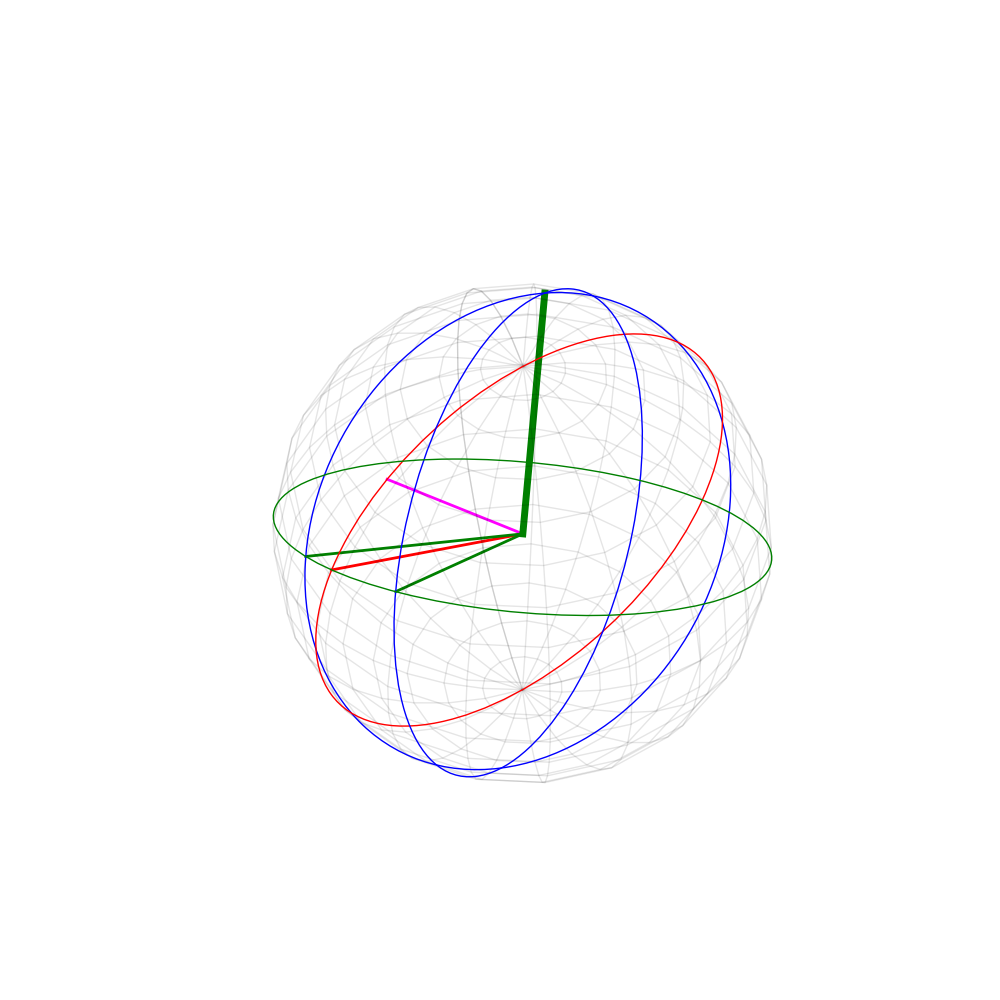

(-1.4698463103929542,
 0.5301536896070458,
 -0.8289899283371656,
 1.1710100716628344)

In [6]:
%matplotlib notebook
plot = plots.SpherePlot(radius=1)

plot.plot_great_circle(axis=edge1_gc, radius=1, fill=False, edgecolor='green')
#plot.plot_great_circle(axis=edge2_gc, radius=1, fill=False, edgecolor='green')
plot.plot_great_circle(axis=left1_gc, radius=1, fill=False, edgecolor='blue', alpha=1)
plot.plot_great_circle(axis=right1_gc, radius=1, fill=False, edgecolor='blue', alpha=1)

plot.plot_great_circle(axis=ray, radius=1, fill=False, edgecolor='red')

plot.plot_nvector(point_ecef, color='magenta',  linewidth=2)
plot.plot_nvector(intersection1, color='red',  linewidth=2)
plot.plot_nvector(node1_ecef, color='green',  linewidth=2)
plot.plot_nvector(node2_ecef, color='green',  linewidth=2)

plot.plot_nvector(edge1_gc, color='green',  linewidth=5)

plot.make_sphere(wire=True, only_north=False, only_front=False,  alpha=0.1)
plot.zoom_to(point[1]+10, point[0]+50, 1, set_azimuth=True)


plot.ax.axis('off')